In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_accidents=pd.read_csv("US_Accidents_Dec21_updated.csv")

In [5]:
df_accidents.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

Due to this data set is huge we've decided to remove all the accidents during 2016 to 2017. The purpose of this project is compare the accidents 2 years before covid and during the pandemic.

In [7]:
import datetime

In [8]:
df_accidents['year'] = pd.DatetimeIndex(df_accidents['Start_Time']).year
df_accidents['month'] = pd.DatetimeIndex(df_accidents['Start_Time']).month
df_accidents['day'] = pd.DatetimeIndex(df_accidents['Start_Time']).day

In [9]:
df_accidents.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year,month,day
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,Night,Night,Night,Night,2016,2,8
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,Night,Night,Night,Night,2016,2,8
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,Night,Night,Night,Day,2016,2,8
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,Night,Night,Day,Day,2016,2,8
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,Day,Day,Day,Day,2016,2,8


After doing this its possible to eliminate all the accidents that happened before 2018

In [10]:
filtro = df_accidents['year'] >=2018
df_filter=df_accidents[filtro]

In [11]:
df_filter.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year,month,day
224945,A-224946,2,2021-03-10 19:57:00,2021-03-11 05:28:02,42.382359,-71.022318,42.383346,-71.021204,0.089,RT-1A Both Directions 0.20 mi. before Curtis St,...,False,False,False,Night,Night,Night,Night,2021,3,10
224946,A-224947,2,2021-07-30 23:37:00,2021-07-31 03:22:58,40.908676,-123.707116,40.904856,-123.740056,1.740,Accident on CA-96 (CA-299) from CR-7K100/Titlo...,...,False,False,False,Night,Night,Night,Night,2021,7,30
224947,A-224948,2,2021-10-15 16:42:36,2021-10-15 17:02:36,38.970628,-77.116333,38.973149,-77.121876,0.345,Stationary traffic on MD-190 from Dorset Ave (...,...,False,False,False,Day,Day,Day,Day,2021,10,15
224948,A-224949,2,2021-12-21 11:42:00,2021-12-21 12:21:00,47.642651,-122.318590,47.643411,-122.308460,0.474,Slow traffic on WA-520 E from I-5/Roanoke St/H...,...,False,False,False,Day,Day,Day,Day,2021,12,21
224949,A-224950,2,2021-12-09 08:51:00,2021-12-09 11:01:22,37.419536,-122.090640,37.410966,-122.076087,0.994,Accident on Amphitheatre Pkwy (US-101) from Sh...,...,False,False,False,Day,Day,Day,Day,2021,12,9


In [12]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2559400 entries, 224945 to 2845341
Data columns (total 50 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)

In [13]:
df_filter['year'].unique() 

array([2021, 2020, 2018, 2019], dtype=int64)

It is possible to observe that this dataframe is filter and is considering only the accidents in 2018,2019,2020 and 2021.

# POINT 2 

In [14]:
df_filter.shape

(2559400, 50)

This new data frame has 2559400 observations and 50 columns.
We now that is a huge that set that we have to analize but the purpose is to compare two years before the pandemic.

In [15]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2559400 entries, 224945 to 2845341
Data columns (total 50 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)

It is possibel to see that this data set has two variables:qualitative and quantitative
About qualitative variable there are object and bool, and quantitative here are int64 and float 64.
The variable bool is a categorical binary variable that means that this variable has two possible values TRUE OR FALSE.


In [16]:
df_filter.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),year,month,day
count,2.559400e+06,2.559400e+06,2.559400e+06,2.559400e+06,2.559400e+06,2.559400e+06,1.045209e+06,2.496394e+06,2.332422e+06,2.492882e+06,2.505424e+06,2.496199e+06,2.451207e+06,2.262117e+06,2.559400e+06,2.559400e+06,2.559400e+06
mean,2.103797e+00,3.615334e+01,-9.732427e+01,3.615346e+01,-9.732402e+01,6.994206e-01,8.130154e+03,6.157971e+01,6.023204e+01,6.444760e+01,2.941333e+01,9.072380e+00,7.228827e+00,6.067851e-03,2.020362e+03,7.551563e+00,1.610547e+01
std,4.324544e-01,5.398475e+00,1.839272e+01,5.398544e+00,1.839251e+01,1.541213e+00,1.854703e+04,1.863880e+01,2.080277e+01,2.291593e+01,1.081106e+00,2.680231e+00,5.511014e+00,6.726841e-02,9.031111e-01,3.674483e+00,8.707153e+00
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.018000e+03,1.000000e+00,1.000000e+00
25%,2.000000e+00,3.334620e+01,-1.180861e+02,3.334754e+01,-1.180863e+02,4.700000e-02,1.295000e+03,4.900000e+01,4.800000e+01,4.800000e+01,2.924000e+01,1.000000e+01,3.000000e+00,0.000000e+00,2.020000e+03,4.000000e+00,9.000000e+00
50%,2.000000e+00,3.593555e+01,-9.296794e+01,3.593809e+01,-9.296692e+01,2.230000e-01,4.043000e+03,6.300000e+01,6.300000e+01,6.700000e+01,2.978000e+01,1.000000e+01,7.000000e+00,0.000000e+00,2.021000e+03,8.000000e+00,1.600000e+01
75%,2.000000e+00,4.007395e+01,-8.036739e+01,4.007372e+01,-8.036771e+01,7.750000e-01,9.600000e+03,7.600000e+01,7.600000e+01,8.400000e+01,2.999000e+01,1.000000e+01,1.000000e+01,0.000000e+00,2.021000e+03,1.100000e+01,2.300000e+01
max,4.000000e+00,4.900027e+01,-6.740355e+01,4.900214e+01,-6.740355e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01,2.021000e+03,1.200000e+01,3.100000e+01


Using this method, we can determine the central tendency and variability measures.<br>
These variables relate to the location of the accident, so they are not relevant for this analysis (Start_Lat,Start_Lng,End_Lat,End_Lng).<br>
As a next step in our analysis, we will delete the column Number, which is an ID.<br>
Distance(mi), Temperature(F), Wind_Chill(F), Humidity(%),Pressure(in), Visibility(mi), Wind_Speed(mph) and Precipitation(in) are the most important quantitative features, as they are not symetrical. 

In [17]:
df_filter.describe(include=[object]).T

,count,unique,top,freq
ID,2559400,2559400,A-224946,1
Start_Time,2559400,1725408,2021-01-26 16:16:13,214
End_Time,2559400,2117292,2021-11-22 08:00:00,88
Description,2559400,1109986,A crash has occurred causing no to minimum del...,7978
Street,2559398,153804,I-5 N,34674
Side,2559400,3,R,2096621
City,2559291,11080,Miami,102296
County,2559400,1643,Los Angeles,209950
State,2559400,49,CA,727046
Zipcode,2558266,344424,91761,5679


Using this method, we can observe all qualitative variables, including their mode and frequency.<br>
It can be concluded, for instance, that Miami had the most traffic accidents this year (2018-2021).Similarly, we might assume that traffic accidents occur most often on rainy days or when visibility is poor, but this table shows the opposite. Most accidents occur when the weather is fair.

In [18]:
skewness_df = df_filter.skew()
print(skewness_df)

Severity               3.280928
Start_Lat             -0.097281
Start_Lng             -0.220052
End_Lat               -0.097300
End_Lng               -0.220054
Distance(mi)          16.139313
Number               160.045922
Temperature(F)        -0.480062
Wind_Chill(F)         -0.731721
Humidity(%)           -0.424921
Pressure(in)          -3.067158
Visibility(mi)         2.804502
Wind_Speed(mph)        8.326652
Precipitation(in)    153.039479
Amenity                9.730688
Bump                  50.687915
Crossing               3.284650
Give_Way              20.579077
Junction               2.862108
No_Exit               25.568807
Railway               11.026768
Roundabout           149.826245
Station                6.059250
Stop                   7.115970
Traffic_Calming       39.514907
Traffic_Signal         2.789000
Turning_Loop           0.000000
year                  -1.295058
month                 -0.378600
day                   -0.036068
dtype: float64


Boolean variables are considering as a value in python that means that if we calculate any Central tendency measure and measure of variability those variables will be consider. In this case the boolean variable when is true=1 and false=0.
Due to this we can observe that the variable roundabout has a positive skew=149,82 that means that is positive skew so the mayority of the values are False=0.
We can also observe that we have only one variable that is skew=0 that means that is symetrical in this case this variable (Turning_Lopp), is boolean so all the values for this variable are 0.
If we observe the rest of our features, we can observe that we have positive a negative skew.

In [19]:
kurtosis_df = df_filter.kurtosis()
print(kurtosis_df)

Severity                11.788398
Start_Lat               -0.601010
Start_Lng               -1.670776
End_Lat                 -0.600944
End_Lng                 -1.670787
Distance(mi)           776.583300
Number               80911.864268
Temperature(F)           0.020206
Wind_Chill(F)            0.482464
Humidity(%)             -0.680565
Pressure(in)            14.172671
Visibility(mi)         106.714101
Wind_Speed(mph)       1259.964896
Precipitation(in)    42976.001907
Amenity                 92.686366
Bump                  2567.266713
Crossing                 8.788935
Give_Way               421.498760
Junction                 6.191668
No_Exit                651.764412
Railway                119.589714
Roundabout           22445.921090
Station                 34.714537
Stop                    48.637069
Traffic_Calming       1559.429116
Traffic_Signal           5.778524
Turning_Loop             0.000000
year                     0.659894
month                   -1.222035
day           

*Explain about this .

# POINT 3,4, 5 y 6

During this step, we will analyze two variables (qualitative and quantitative). Following are the variables that we will analyze for a better understanding of our data: City(qualitative),Wind_Speed(quantitative)

In [56]:
city_count=df_filter["City"].value_counts().nlargest(10)
print(city_count)

Miami          102296
Los Angeles     62314
Orlando         51902
Dallas          36097
Houston         32407
Sacramento      30184
Charlotte       25842
San Diego       23899
Raleigh         21597
Minneapolis     20423
Name: City, dtype: int64


In [57]:
df_filter["City"].describe()

count     2559291
unique      11080
top         Miami
freq       102296
Name: City, dtype: object

<AxesSubplot:>

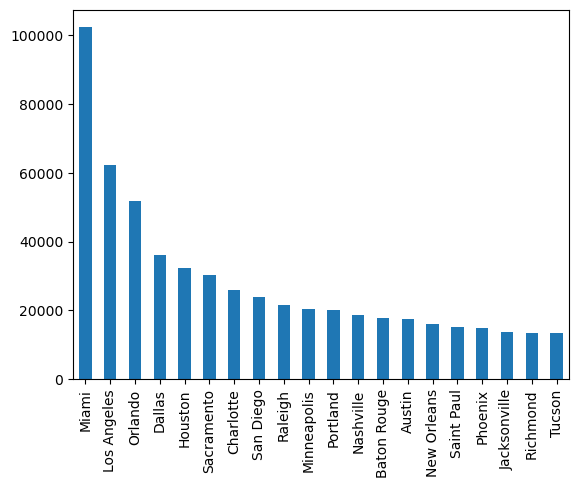

In [60]:
df_filter.City.value_counts()[:20].plot(kind='bar')

In [50]:
df_filter["Distance(mi)"].describe()

count    2.559400e+06
mean     6.994206e-01
std      1.541213e+00
min      0.000000e+00
25%      4.700000e-02
50%      2.230000e-01
75%      7.750000e-01
max      1.551860e+02
Name: Distance(mi), dtype: float64

In [51]:
mode_speed=df_filter["Distance(mi)"].mode()
print(mode_speed)

0    0.0
Name: Distance(mi), dtype: float64


In [53]:
min_temp = df_filter["Distance(mi)"].max()
print(min_temp)

155.186


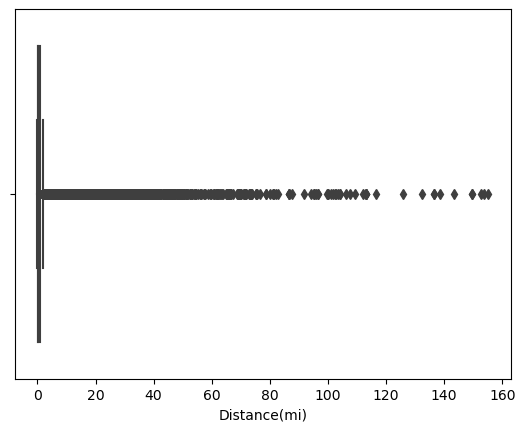

In [54]:
sns.boxplot( x=df_filter["Distance(mi)"])
plt.show()

<AxesSubplot:xlabel='Distance(mi)', ylabel='Frequency'>

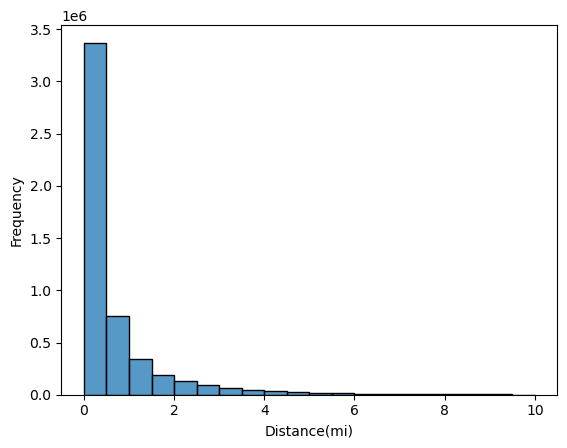

In [55]:
sns.histplot(df_filter['Distance(mi)'],stat='frequency',binrange=(0,10),bins = 20)

We can determine the length of the damaged road by looking at the variable distance (miles). This variable indicates that the majority of accidents did not affect the roads, as the highest frequency of our data is between 0 and 1 mile. The variable has extreme cases, such as an accident that affected a highway for 155 miles (249 km).

In [ ]:
Missing values??

In [ ]:
df_filter.isnull().sum()

In [ ]:
missing_percentages = df_filter.isna().sum().sort_values(ascending=False)/len(df_filter)
missing_percentages

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

There are 60% missing values in the feature Number. We are going to eliminate that feature, as well as the Airpot Code, and Weather_timestamp, because they are not relevant to our analysis.<br>
The variables Weather_Condition and Wind_Direction are quantitative variables, so we will eliminate those rows that are blank.
Those variables with missing values (Pressure(in), Temperature(F), Visibility(mi), Humidity(%), Wind_speed(mph), Wind_Chill(F) and Precipitation(in)) will be replaced with the median because they do not have a symmetrical distribution, and if we replace them with the mean, outliers will affect the mean.

# Cleaning Data

### Dealing with Missing values

Dropping columns

In [ ]:
df_filter.drop(['Number', 'Weather_Timestamp'], axis=1,inplace=True)
df_filter.shape

Dropping na rows

In [ ]:
df_filter.dropna(subset = ['Weather_Condition','Wind_Direction','City','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','Street'],inplace=True)
df_filter.shape

Replacing missing values for the Median

In [ ]:
df_filter.fillna(df_filter.median(),inplace=True)
df_filter.head()

In [ ]:
df_filter.isnull().sum()

Now our dataset is clean, we don't have any missing value.


In [ ]:
# Checking for duplicates
duplicate_rows=[nba.duplicated()]
print('Number of duplicate rows: ',duplicate_rows.shape[0])

In [ ]:
df_duplicated_rows=df_filter[df_filter.duplicated()]
df_duplicated_rows.shape